In [ ]:
!pip install nltk
!pip install matplotlib
!pip install wordcloud

In [ ]:
import pandas as pd
from google.colab import drive
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import data from file
drive.mount('/content/drive')
cnn = pd.read_csv('/content/drive/My Drive/MSCI 598 (Deep Learning for NLP) Project/Code/cnn_best_pred.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Filter for one MBTI types
mbti_I = cnn[cnn['IE_pred'] == 1][['text', 'mbti', 'IE', 'IE_pred']]
mbti_E = cnn[cnn['IE_pred'] == 0][['text', 'mbti', 'IE', 'IE_pred']]
mbti_N = cnn[cnn['NS_pred'] == 1][['text', 'mbti', 'NS', 'NS_pred']]
mbti_S = cnn[cnn['NS_pred'] == 0][['text', 'mbti', 'NS', 'NS_pred']]
mbti_T = cnn[cnn['TF_pred'] == 1][['text', 'mbti', 'TF', 'TF_pred']]
mbti_F = cnn[cnn['TF_pred'] == 0][['text', 'mbti', 'TF', 'TF_pred']]
mbti_J = cnn[cnn['JP_pred'] == 1][['text', 'mbti', 'JP', 'JP_pred']]
mbti_P = cnn[cnn['JP_pred'] == 0][['text', 'mbti', 'JP', 'JP_pred']]

In [ ]:
# Adding some custom stop words: know, think, want, thing, see, yeah, good, time, something
stop_words = stopwords.words('english')+["know", "want", "think", "one", "well" ,"ye"]

In [ ]:
# Tokenize all words in prediction
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = {}
tokens['i'] = []
tokens['e'] = []
tokens['n'] = []
tokens['s'] = []
tokens['t'] = []
tokens['f'] = []
tokens['j'] = []
tokens['p'] = []

def tokenize_words(text, type):
  nltk_tokens = tokenizer.tokenize(text)
 
  filtered_sentence = [w for w in nltk_tokens if not w.lower() in stop_words]

  for t in filtered_sentence:
    tokens[type].append(t.lower())

mbti_I.apply(lambda row: tokenize_words(row['text'], 'i'),axis=1)
mbti_E.apply(lambda row: tokenize_words(row['text'], 'e'),axis=1)
mbti_N.apply(lambda row: tokenize_words(row['text'], 'n'),axis=1)
mbti_S.apply(lambda row: tokenize_words(row['text'], 's'),axis=1)
mbti_T.apply(lambda row: tokenize_words(row['text'], 't'),axis=1)
mbti_F.apply(lambda row: tokenize_words(row['text'], 'f'),axis=1)
mbti_J.apply(lambda row: tokenize_words(row['text'], 'j'),axis=1)
mbti_P.apply(lambda row: tokenize_words(row['text'], 'p'),axis=1)

1       None
2       None
3       None
4       None
5       None
        ... 
4612    None
4613    None
4615    None
4618    None
4619    None
Length: 2362, dtype: object

In [ ]:
# Create wordclouds
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(type, i):
  comment_words = tokens[type]
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  min_font_size = 10).generate((" ").join(comment_words))
  
  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()
  print("\033[1mFigure C"+str(i)+".\033[0m Word Cloud for "+ type.upper())

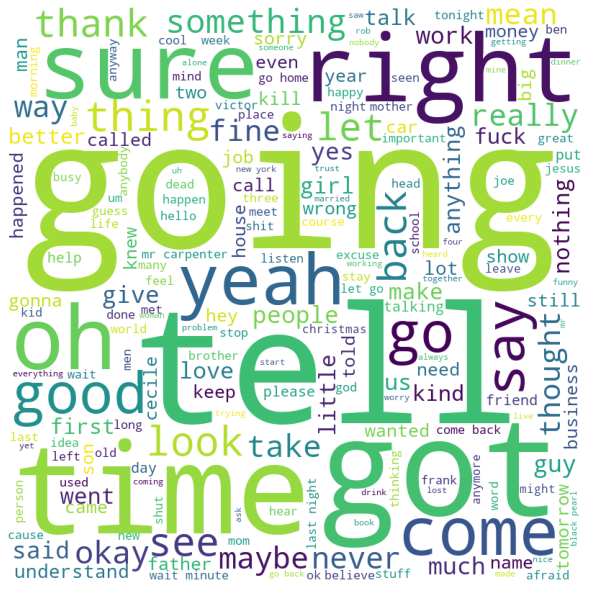

Figure C1. Word Cloud for ESTJ


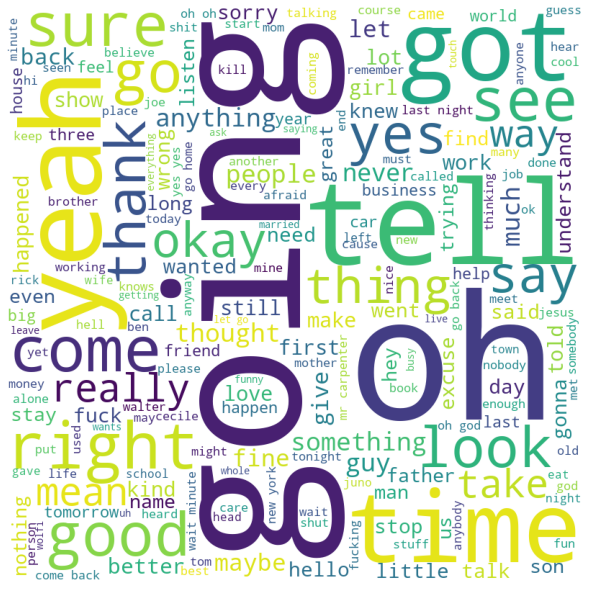

Figure C2. Word Cloud for ENTJ


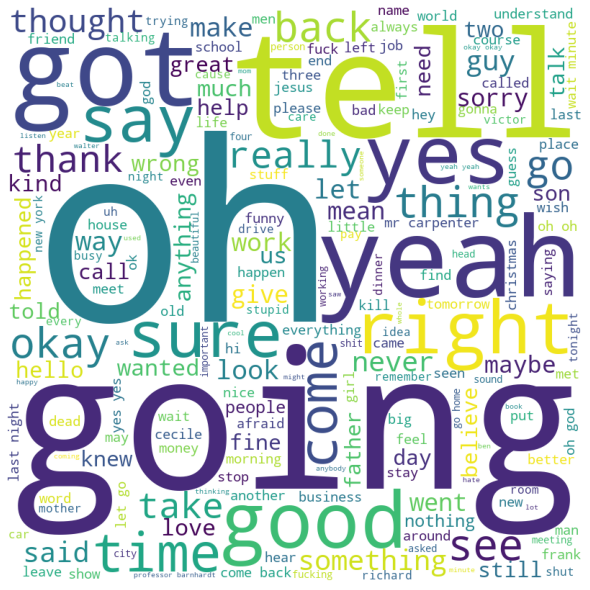

Figure C3. Word Cloud for ESFJ


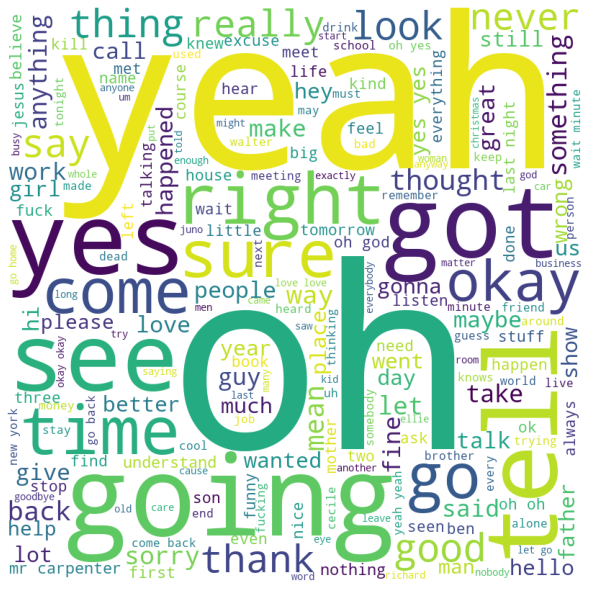

Figure C4. Word Cloud for ENFJ


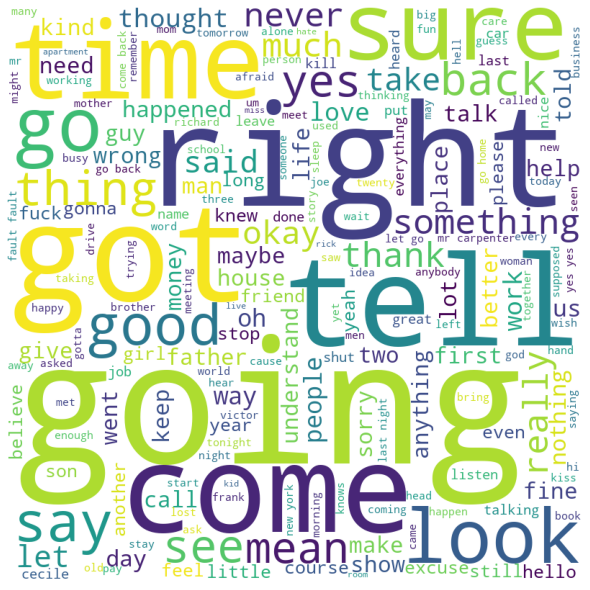

Figure C5. Word Cloud for ISTJ


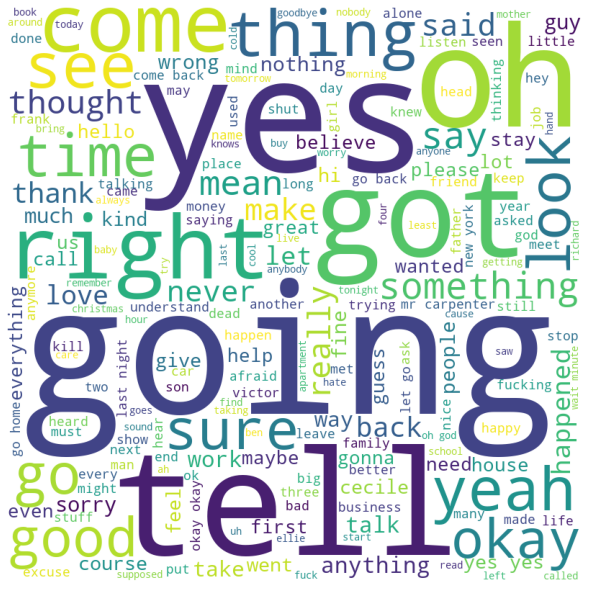

Figure C6. Word Cloud for ISFJ


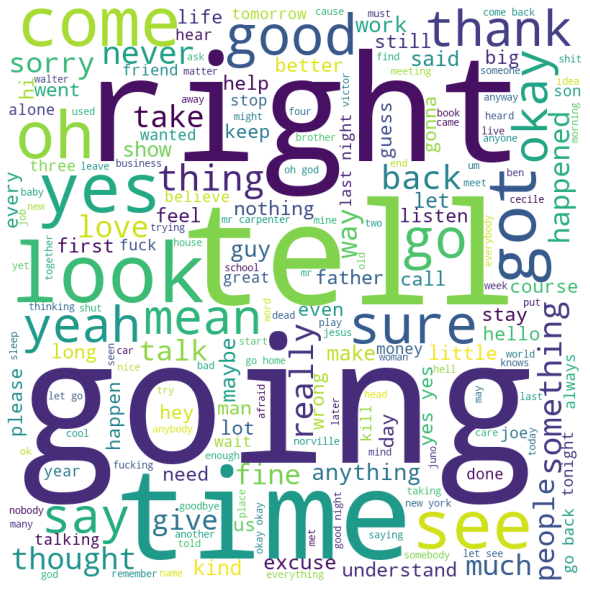

Figure C7. Word Cloud for INTJ


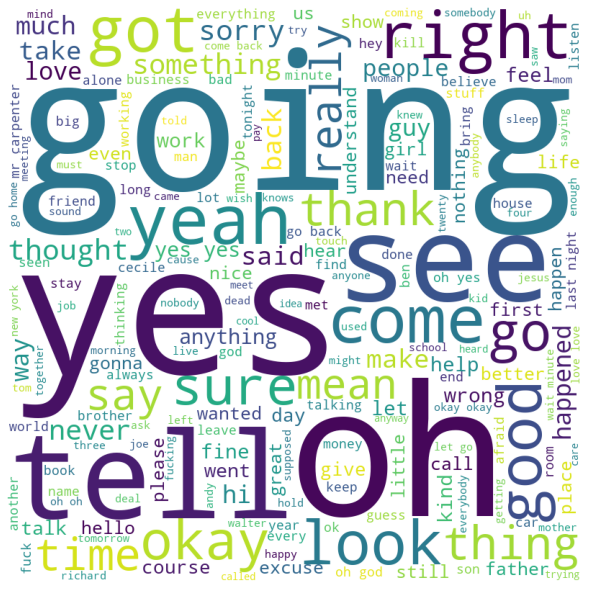

Figure C8. Word Cloud for INFJ


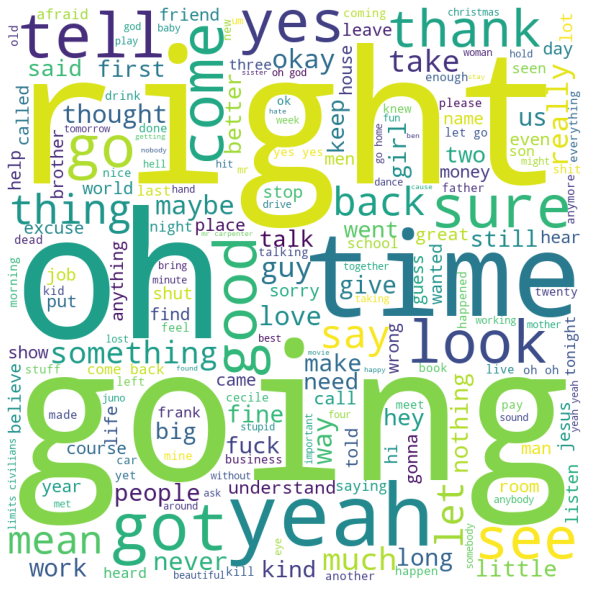

Figure C9. Word Cloud for ESTP


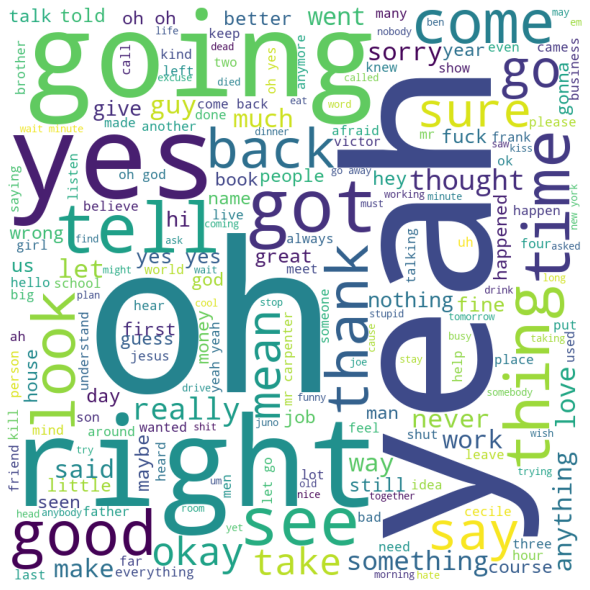

Figure C10. Word Cloud for ESFP


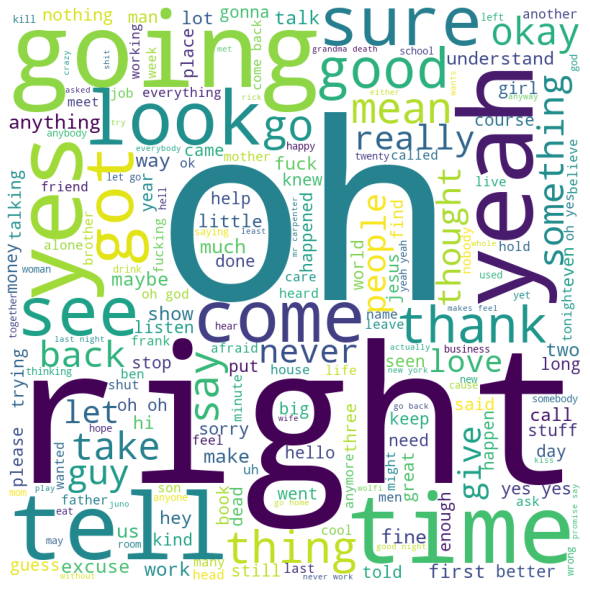

Figure C11. Word Cloud for ENTP


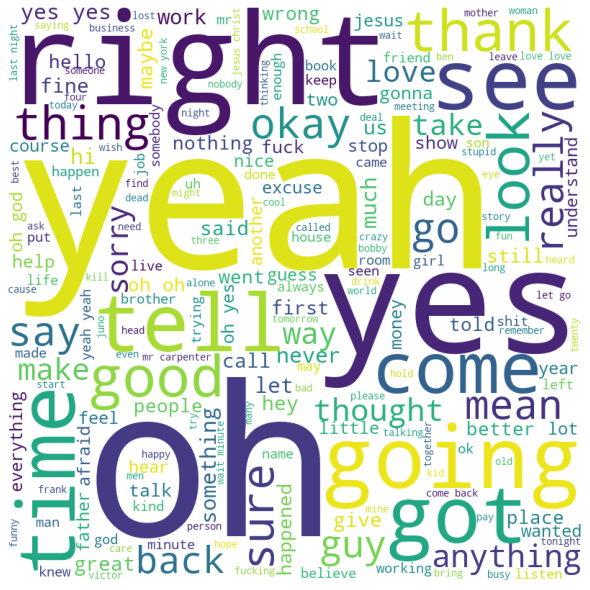

Figure C12. Word Cloud for ENFP


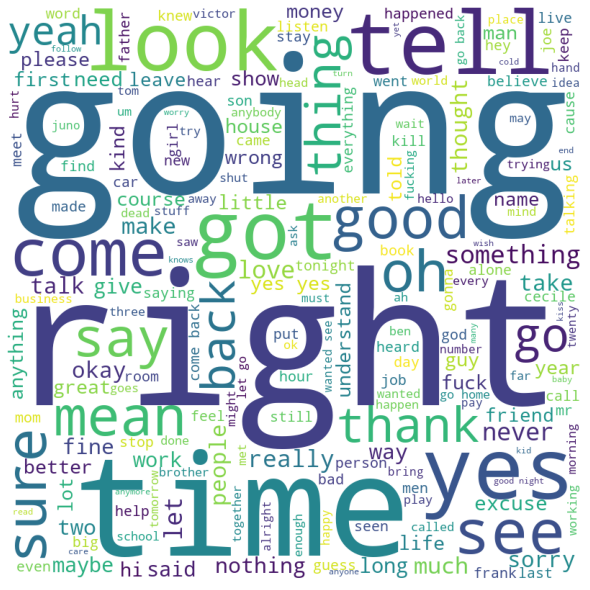

Figure C13. Word Cloud for ISTP


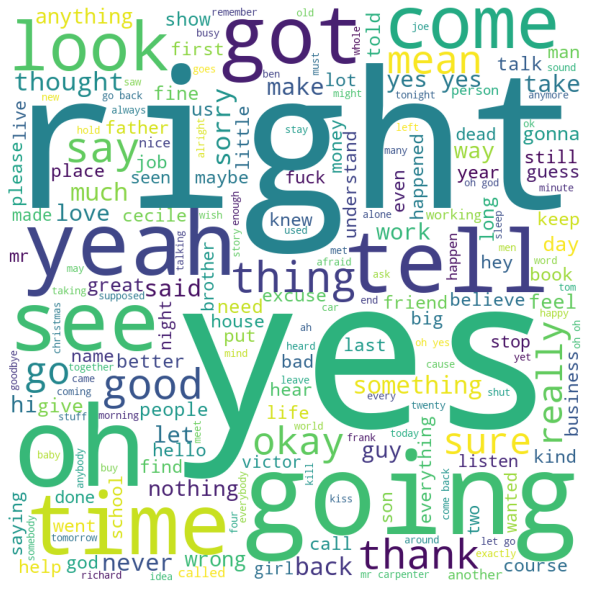

Figure C14. Word Cloud for ISFP


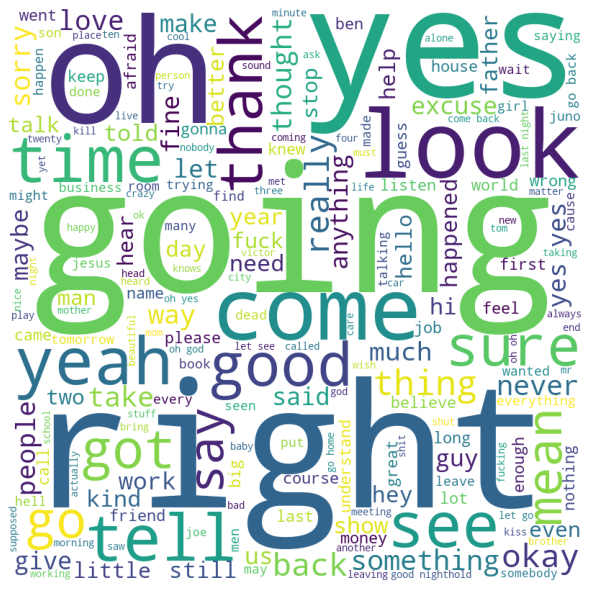

Figure C15. Word Cloud for INTP


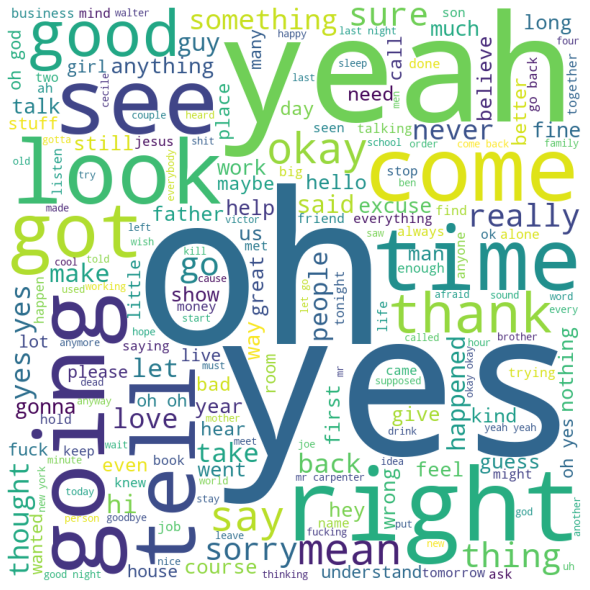

Figure C16. Word Cloud for INFP


In [ ]:
# Generate 16 MBTI Wordclouds
mbti_types = ['estj', 
              'entj', 
              'esfj', 
              'enfj', 
              'istj', 
              'isfj', 
              'intj', 
              'infj', 
              'estp', 
              'esfp', 
              'entp', 
              'enfp', 
              'istp', 
              'isfp', 
              'intp', 
              'infp']

i = 1
for t in mbti_types:
  tokens[t] = tokens[t[0]]+tokens[t[1]]+tokens[t[2]]+tokens[t[3]]
  generate_wordcloud(t, i)
  i += 1